In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
def load_housing_data(housing_path = './'):
    csv_path = os.path.join(housing_path, 'ershouhousing2.csv')
#     return pd.read_csv(csv_path,names=['title','block','district',
#                                        'houseType','houseArea','houseOrientation','ouseCover','houseFloor',
#                                        'houseHistory','houseStructure',
#                                        'houseFollowing','houseRelease',
#                                        'totalPrice','unitPrice','longitudeLatitude','"longitudeLatitude"',
#                                        'houseVR','houseAge','anytime','subway',
#                                        'title_url'])
    return pd.read_csv(csv_path)

In [2]:
housing_r = load_housing_data()

In [3]:
def extract(x):
    try:
        y = int(x.split('年')[0])
    except:
        y = ''
    return y

housing_r['houseArea'] = housing_r['houseArea'].apply(lambda x: float(x.split('平米')[0]))
housing_r['houseHistory'] = housing_r['houseHistory'].apply(lambda x: extract(x))

In [4]:
# housing.to_csv('ershouhousing2.csv',encoding="utf-8",index=False)
housing = housing_r

In [5]:
housing.describe()  # 显示数值属性摘要

,houseArea,totalPrice,unitPrice
count,2495.000000,2495.000000,2495.000000
mean,87.164625,487.617475,56137.656112
std,50.881967,448.183405,24428.017196
min,21.770000,46.000000,10110.000000
25%,56.065000,272.000000,38724.500000
50%,77.550000,369.000000,54156.000000
75%,101.260000,521.500000,69996.500000
max,565.870000,7900.000000,169975.000000


In [6]:
# # 将alpha 设置为 0.1 ， 可以看出高密度数据点的位置
# housing.plot(kind='scatter', x='longitude', y = 'latitude', alpha=0.1)

In [8]:
# # 我们的大脑非常善于从图片中发现模式，但是需要玩转可视化参数才能让这些模式凸显出来
# import matplotlib.pyplot as plt

# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#     s=housing["totalPrice"]/30, label="totalPrice", figsize=(20,14),
#     c="unitPrice", cmap=plt.get_cmap("jet"), colorbar=True,
#     sharex=False)

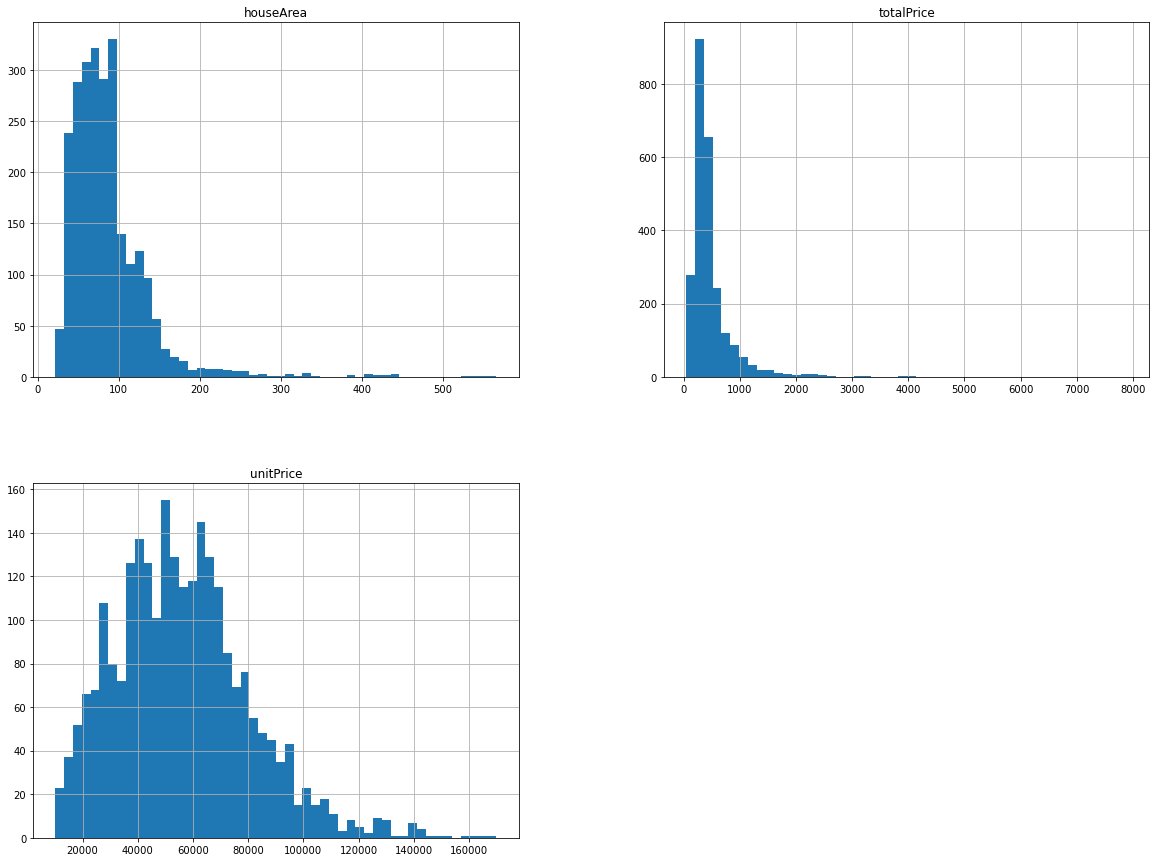

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [32]:
import numpy as np
# housing['unitPrice_cat'] = np.ceil(housing['unitPrice']/10000)
# housing['unitPrice_cat'].where(housing['unitPrice_cat'] < 15, 15, inplace = True )
# set(housing['unitPrice_cat'])

In [33]:
housing['unitPrice_cat'] = pd.cut(housing['unitPrice'], bins=[0,20000,40000,60000,80000,100000,
                                                              120000,np.inf],
                                  labels = [2,4,6,8,10,12,14]) # 把连续值转换成类别标签  
set(housing['unitPrice_cat'])

{2, 4, 6, 8, 10, 12, 14}

In [34]:
housing['totalPrice_cat'] = pd.cut(housing['totalPrice'], bins=[0,300,500,700,900,1500,2500,np.inf],
                                  labels = [300,500,700,900,1500,2500,4000]) # 把连续值转换成类别标签  
set(housing['totalPrice_cat'])

{300, 500, 700, 900, 1500, 2500, 4000}

In [35]:
housing[['totalPrice_cat','totalPrice']]

,totalPrice_cat,totalPrice
0,300,210.0
1,500,407.0
2,300,265.0
3,300,155.0
4,300,203.0
...,...,...
2490,500,495.0
2491,700,555.0
2492,700,625.0
2493,500,345.0


In [36]:
housing.to_csv('ershouhousing3.csv',encoding="utf-8",index=False)

In [39]:
import geopandas

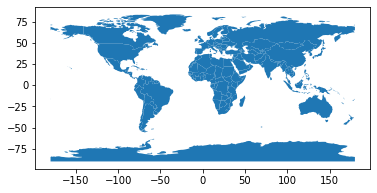

In [40]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()
plt.show()

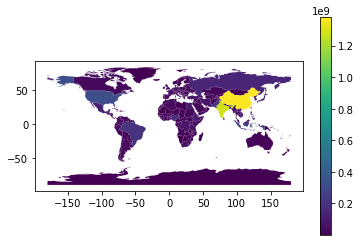

In [41]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1)
world.plot(column= 'pop_est', ax=ax, legend=True)
plt.show()

In [46]:
# import osmnx as ox
import geopandas as gpd

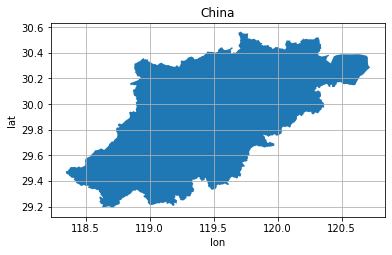

In [56]:
# 地图json获取：DATAV.GeoAtlas
# http://datav.aliyun.com/tools/atlas/#&lat=30.332329214580188&lng=106.72278672066881&zoom=3.5
import requests
from geopandas import GeoDataFrame
from shapely.geometry import shape
import matplotlib.pyplot as plt
def get_bound_and_save_json():
    url = "https://geo.datav.aliyun.com/areas_v3/bound/geojson?code=330000_full"
    r = requests.get(url)
    return r.json()['features'][0]['geometry']
b = shape(get_bound_and_save_json())
geodf = GeoDataFrame([{'geometry': b}])
geodf.plot()
plt.title("China")
plt.xlabel('lon')
plt.ylabel('lat')
plt.grid()
plt.show()


In [50]:
sh = geopandas.read_file(geopandas.datasets.get_path('Shanghai_lowres'))

ValueError: The dataset 'Shanghai_lowres' is not available. Available datasets are naturalearth_cities, naturalearth_lowres, nybb

In [57]:
# file = r"中国省级地图GS（2019）1719号.geojson"
# nine = r"九段线GS（2019）1719号.geojson"
# china_main = gpd.read_file(file)
# china_nine = gpd.read_file(nine)
# fig, ax = plt.subplots(figsize=(12, 8),dpi=80)
# ax = china_main.plot(ax=ax)
# ax = china_nine.plot(ax=ax)

DriverError: 中国省级地图GS（2019）1719号.geojson: No such file or directory

In [58]:
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [59]:
gdf = gdf.set_index("BoroName")

In [60]:
gdf["area"] = gdf.area
gdf["area"]

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

In [61]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [62]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

In [63]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

In [64]:
gdf['distance'].mean()

76140.09102166798

<AxesSubplot:>

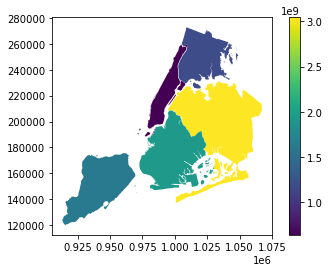

In [65]:
gdf.plot("area", legend=True)

<AxesSubplot:>

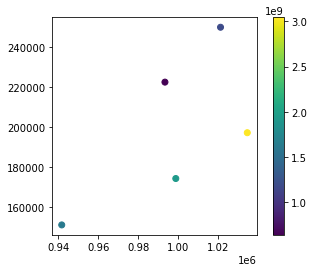

In [66]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

In [70]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
df = geopandas.read_file(url)
df

,scalerank,featureclass,geometry
0,1,Country,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,1,Country,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,1,Country,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,1,Country,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,1,Country,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,1,Country,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,1,Country,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,1,Country,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,1,Country,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


In [73]:
path = "simplecache::http://download.geofabrik.de/antarctica-latest-free.shp.zip"
with fsspec.open(path) as file:
    df = geopandas.read_file(file)

NameError: name 'fsspec' is not defined

In [84]:
zipfile = "C:/ProgramData/Anaconda3/Lib/site-packages/geopandas/datasets/China/上海市/徐汇区.shp"
xuhui = geopandas.read_file(zipfile)

<AxesSubplot:>

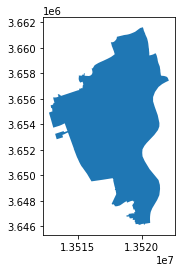

In [85]:
xuhui.to_crs("EPSG:3857").plot()

In [90]:
import osmnx as ox
import geopandas as gpd

"""下载城市边界"""
city = ox.geocode_to_gdf('china')

"""基于范围下载路网"""
G = ox.graph_from_bbox(22.5229, 22.5178, 113.9265, 113.9360, network_type='drive')
G_projected = ox.project_graph(G)

"""保存为geodataframe"""
nodes, edges = ox.graph_to_gdfs(G_projected)

ChunkedEncodingError: ('Connection broken: IncompleteRead(1632 bytes read, 8608 more expected)', IncompleteRead(1632 bytes read, 8608 more expected))

In [ ]:
fig = plt.figure(figsize=(15,15),dpi=300)
ax = fig.add_subplot(1,1,1)
xuhui.boundary.to_crs("EPSG:3857").plot(ax=ax, edgecolor='k',linewidth=1, zorder=2)
city.boundary.to_crs("EPSG:3857").plot(ax=ax,edgecolor='gray',linewidth=0.8,zorder=1)
for idx, _ in enumerate(city.geometry.representative_point().to_crs(3857)):
    region = city.loc[idx, 'NL_NAME_2']
    ax.text(_.x, _.y, region, ha="center", va="center", size=6,color='k')
military_point.to_crs("EPSG:3857").plot(column='type', cmap='YlGn',markersize=5,edgecolor='k',linewidth=0.3, ax=ax, legend=True,legend_kwds={'loc': 8,"title":"图例","shadow":True,"ncol":5}, zorder=3)
ctx.add_basemap(ax, source='https://d.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png',zoom=8)